## **Predicting** survival of passengers in titanic dataset


In [1]:
from IPython.display import clear_output
%pip install gdown==4.5
clear_output()

#### **Download** the CSV file

In [2]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /Users/abdullah/Desktop/Abdullah Eid 1116364900/titanic.csv
100%|███████████████████████████████████████| 60.3k/60.3k [00:00<00:00, 459kB/s]


#### **Import** libaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### **Load** and **Preprocessing** Data

In [4]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

#### **Info.** about input featues

In [7]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### **Check** missing values

In [8]:
miss_values = data_x.isna().sum()
miss_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data_x['Age'].fillna(data_x['Age'].median(), inplace=True)  # .median()  because i want the middle value of Ages to fill
data_x['Embarked'].fillna(data_x['Embarked'].mode()[0], inplace=True) # .mode() because we have theree discrete values

#### **One** hot encoding

In [10]:
data_x = pd.get_dummies(data_x, columns=['Sex','Embarked'],drop_first=True, dtype=int)

#### **Feature** engineering

In [12]:
data_x['FamilySize'] = data_x['SibSp'] + data_x['Parch'] + 1

#### **Drop** unnecessary columns

In [13]:
data_x.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'PassengerId',], axis=1, inplace=True)

In [14]:
data_x.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,3,22.0,7.2500,1,0,1,2
1,1,38.0,71.2833,0,0,0,2
2,3,26.0,7.9250,0,0,1,1
3,1,35.0,53.1000,0,0,1,2
4,3,35.0,8.0500,1,0,1,1


In [15]:
data_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
titanic_data = pd.concat([data_x, data_y], axis=1)

In [18]:
titanic_data.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,Survived
0,3,22.0,7.2500,1,0,1,2,0
1,1,38.0,71.2833,0,0,0,2,1
2,3,26.0,7.9250,0,0,1,1,1
3,1,35.0,53.1000,0,0,1,2,1
4,3,35.0,8.0500,1,0,1,1,0


#### **Splitting** data frame

In [19]:
# Splitting data and convert it to numpy array
# And shuffling data there is many benefits, like avoiding bised order
def train_test_splitting(data, train_percentage=0.8):
    data = np.array(data)
    np.random.shuffle(data)
    split_idx = int(train_percentage * len(data))
    train_set = data[:split_idx, :]
    test_set = data[split_idx: , :]
    return train_set, test_set

In [20]:
train_set, test_set = train_test_splitting(titanic_data) # 80% for train, 20% for test

In [21]:
print(train_set.shape)
print(test_set.shape)

(712, 8)
(179, 8)


In [22]:
X_train = train_set[:,:-1] # input features for training set
y_train = train_set[:,-1] # target for training set
print(X_train.shape)
print(y_train.shape)

(712, 7)
(712,)


In [23]:
X_test = test_set[:,:-1] # input features for testing set
y_test = test_set[:,-1] # target for testing set
print(X_test.shape)
print(y_test.shape)

(179, 7)
(179,)


#### **Prediction** using sklearn

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
model = LogisticRegression()
model.fit(X_train, y_train)  # Training on train set

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = model.predict(X_test)  # Make prediction on unseen data to evaluate the performance of model

In [28]:
correct_mask = (y_pred == y_test)  # Comparing between predicted and original y
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions')
print(f'The Accuracy is {correct_count/total_count*100}%')

The model predicted 145 out of 179 predictions
The Accuracy is 81.00558659217877%


In [27]:
# Anthor to check
print(f'The Accuracy is {model.score(X_test, y_test)*100}%')

The Accuracy is 81.00558659217877%


#### Columns **importance**

In [29]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
feature_importances = result.importances_mean

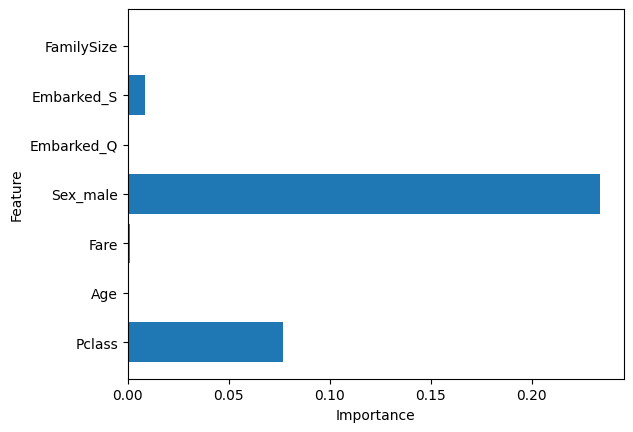

In [30]:

feature_names = ['Pclass','Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize']
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Sex_male the best column affect to the survivability of a passenger.
